In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd

import cv2
import math
import glob
import re
import os
import imageio

tqdm.pandas()

C:\Users\markw\Anaconda3\envs\cv2gpu\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
OFFSET = 4
CHECK_SIZE = 16
THRESHOLD = 250

# get file paths and file names
file_paths = glob.glob('C:/Users/markw/Documents/Master Stage Videos/NGTvideos/*.mp4')
file_paths = [fp.replace('\\', '/') for fp in file_paths]
# filter out small videos
file_paths = [fp for fp in file_paths if 'small' not in fp]
file_names = [fp.split('/')[-1] for fp in file_paths]

# creater train dataframe
df = pd.DataFrame(data={ 'file_path': file_paths, 'file_name': file_names }, dtype='string')
df['label'] = df.index.astype(np.uint16)

In [4]:
display(df.head())

,file_path,file_name,label
0,C:/Users/markw/Documents/Master Stage Videos/N...,#A-3808.mp4,0
1,C:/Users/markw/Documents/Master Stage Videos/N...,#B-3809.mp4,1
2,C:/Users/markw/Documents/Master Stage Videos/N...,#C-3810.mp4,2
3,C:/Users/markw/Documents/Master Stage Videos/N...,#D-3811.mp4,3
4,C:/Users/markw/Documents/Master Stage Videos/N...,#E-3812.mp4,4


In [14]:
def plot(img):
    plt.figure(figsize=(15,10))
    plt.grid()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
def is_studio_video(fp):
    vid = cv2.VideoCapture(fp)
    while vid.isOpened():
        ret_code, frame = vid.read()
        if ret_code:
            area = frame[OFFSET:OFFSET+CHECK_SIZE, OFFSET:OFFSET+CHECK_SIZE, :]
            return area.mean() > THRESHOLD

In [16]:
df['is_studio'] = df['file_path'].progress_apply(is_studio_video)
# drop non studio images
df.drop(df[~df['is_studio']].index, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.info())

  0%|          | 0/4037 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Add Sign Names

In [ ]:
# add sign names
if 'sign_names' not in df.columns:
    sign_names = df['file_name'].apply(lambda file_name: re.search('.*(?=-\d+)', file_name).group(0))
    df.insert(2, 'sign_names', sign_names)
    display(df.sample(5))

# Add Framecount

In [ ]:
# Add Number of Frames
def count_frames(file_path):
    vid = cv2.VideoCapture(file_path)
    n_frames = 0
    while vid.isOpened():
        succes, frame = vid.read()
        if succes:
            n_frames += 1
        else:
            return n_frames
        
df['frame_count'] = df['file_path'].progress_apply(count_frames)
display(df.sample(5))

In [ ]:
plt.figure(figsize=(15,6))
df['frame_count'].plot(kind='hist', bins=64)
plt.show()

# Add Folder Index

In [ ]:
df['folder_index'] = df.index.astype(np.uint16)
display(df.sample(5))

# Add SignBank ID

In [ ]:
# set SignBank ID
df['Signbank ID'] = df['file_name'].apply(lambda fn: int(re.search('\d+(?=.mp4)', fn).group(0)))
display(df.sample(5))

In [ ]:
display(df.info())

In [ ]:
pd.options.display.max_colwidth = 99
display(df.head())

# Save DataFrame and Load

In [ ]:
# save dataframe
df.to_csv('train_ngt.csv', index=False)

In [17]:
df_test = pd.read_csv('train_ngt.csv')
display(df_test)

,,,,,,sep=,Unnamed: 1
file_path,file_name,sign_names,label,is_studio,frame_count,folder_index,Signbank ID
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/#A-3808.mp4,#A-3808.mp4,#A,0,True,76,0,3808
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/#B-3809.mp4,#B-3809.mp4,#B,1,True,77,1,3809
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/#C-3810.mp4,#C-3810.mp4,#C,2,True,75,2,3810
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/#D-3811.mp4,#D-3811.mp4,#D,3,True,76,3,3811
...,...,...,...,...,...,...,...
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/ZWIJGEN-B-3482.mp4,ZWIJGEN-B-3482.mp4,ZWIJGEN-B,4032,True,173,3899,3482
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/ZWITSERLAND-A-661.mp4,ZWITSERLAND-A-661.mp4,ZWITSERLAND-A,4033,True,156,3900,661
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/ZWITSERLAND-B-4195.mp4,ZWITSERLAND-B-4195.mp4,ZWITSERLAND-B,4034,True,169,3901,4195
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/ZWITSERLAND-C-4590.mp4,ZWITSERLAND-C-4590.mp4,ZWITSERLAND-C,4035,True,69,3902,4590


# Create training TXT files

In [18]:
df = pd.read_csv('train_ngt.csv')
display(df_test.sample(5))

,,,,,,sep=,Unnamed: 1
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/WETEN-A-IK-203.mp4,WETEN-A-IK-203.mp4,WETEN-A-IK,3848,True,163,3731,203
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/#V-3829.mp4,#V-3829.mp4,#V,22,True,93,22,3829
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/PUBER-A-2799.mp4,PUBER-A-2799.mp4,PUBER-A,2757,True,161,2686,2799
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/HEERENVEEN-271.mp4,HEERENVEEN-271.mp4,HEERENVEEN,1428,True,157,1388,271
C:/Users/markw/Documents/Maste Stage Videos/NGTvideos/VARKEN-110.mp4,VARKEN-110.mp4,VARKEN,3498,True,133,3406,110


In [19]:
# Create Categories TXT File
with open('MFF OLD/datasets/ngt/categories.txt', 'w', encoding='UTF8') as categories:
    for sign_name in df['sign_names']:
        categories.write(f'{sign_name}\n')

KeyError: 'sign_names'

In [64]:
# Create Videoloader TXT File
with open('MFF OLD/datasets/ngt/train_videofolder.txt', 'w', encoding='UTF8') as videofolder:
    for idx, frame_count, label in df[['frame_count', 'label']].itertuples(name=None):
        videofolder.write(f'{idx} {frame_count} {label}\n')

# Split Video In Frames

In [9]:
# df = pd.read_pickle('train_ngt_dxy_10fps.pkl')
N = 300
df_ngt_val = pd.read_excel(f'backups/ngt_signbank_validation_filtered_backup.xlsx')

df_ngt_val = df_ngt_val.loc[df_ngt_val['Done'] == 'X'].copy()

In [10]:
display(df_ngt_val.info(max_cols=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 259
Columns: 10 entries, Val Size to File Path
dtypes: float64(1), int64(3), object(6)
memory usage: 21.8+ KB


None

In [4]:
# res = []
# for sbid in idxs:
#     i = df.loc[df['Signbank ID'] == sbid, 'folder_index'].values
#     if len(i) > 0:
#         res += i.tolist()
#     else:
#         res += [-1]
    
# for e in res: print(e)

# df.loc[df['Signbank ID'] == 1159]

In [5]:
# res = []
# for idx, row in df_ngt_val.iterrows():
#     #C:\Users\markw\Documents\Maste Stage Videos\NGT Validation Cropped
#     file_name = row['Lemma ID Gloss (Dutch)'] + '-' + str(row['Signbank ID']) + '_Trim.mp4'
#     file_path = os.path.join('C:\\', 'Users', 'markw', 'Documents', 'Master Stage Videos', 'NGT Validation Cropped', file_name)
#     res.append(file_path)

# for e in res: print(e)

In [9]:
display(df_ngt_val.head())

,Val Size,Signbank ID,Lemma ID Gloss (Dutch),Handedness,Location,Person,Done,Label,Folder Index,File Path
0,1.0,1239,OUDERWETS,2a,Weak hand: palm,Mark,X,2415,2457,C:\Users\markw\Documents\Master Stage Videos\N...
1,2.0,2824,BAARD-A,2s,Chin,Mark,X,366,366,C:\Users\markw\Documents\Master Stage Videos\N...
2,3.0,4536,BREKEN,2s,Neutral space,Mark,X,623,625,C:\Users\markw\Documents\Master Stage Videos\N...
3,4.0,1358,EXAMEN,2s,Neutral space,Mark,X,1026,1039,C:\Users\markw\Documents\Master Stage Videos\N...
4,5.0,1398,AMSTEL-B,2a,Weak hand: palm,Mark,X,300,300,C:\Users\markw\Documents\Master Stage Videos\N...


In [39]:
df_ngt_val.loc[df_ngt_val['Folder Index'] == 2022]

,Val Size,Signbank ID,Lemma ID Gloss (Dutch),Handedness,Location,Person,Done,Label,Folder Index,File Path
91,90.0,2201,MAROKKO-A,2s,Face,Mark-Bank,X,2002,2022,C:\Users\markw\Documents\Master Stage Videos\N...


In [20]:
TARGET_FPS

NameError: name 'TARGET_FPS' is not defined

In [16]:
file_path = f'C:/Users/markw/Documents/Master Stage Videos/Filmpjes Stijn/STIJN CROPPED/BIJ-A-1319_Trim.mp4'
vid = cv2.VideoCapture(file_path)
fps = vid.get(cv2.CAP_PROP_FPS)
if fps < 1:
    print(f'idx: {idx}, fps: {fps}, file_path: {file_path}')
fps_ratio = fps / 12
frame_counter = 0
file_name_counter = 1
while vid.isOpened():
    succes, frame = vid.read()
    if succes:
        if int(frame_counter % fps_ratio) == 0:
            # resize frame to target dimension
            h, w, _ = frame.shape
            # save image as jpg
            file_name = str(file_name_counter).rjust(5, '0')
            cv2.imwrite(f'D:/MEGA/Nijmegen/Master Stage/Presentation/blurry hand/{file_name}.jpg', frame)
            file_name_counter += 1
        # increase frame counter
        frame_counter += 1
    else:
        break

In [11]:
TARGET_FPS = 10
SOURCE_PATH = 'C:/Users/markw/Documents/Master Stage Videos'
OUTPUT_PATH = f'C:/Users/markw/Downloads/ngt_{TARGET_FPS}fps_val/rgb'

# Add Number of Frames
def video_to_frames(idx, person, lemma, sign_id, target_size=224, target_frame_rate=TARGET_FPS):
    # make directory
    try:
        os.makedirs(f'{OUTPUT_PATH}/{idx}')
    except:
        pass
    
    # Check if already generated
    if os.path.exists(f'{OUTPUT_PATH}/{idx}/00001.jpg'):
        return
    
    # Replace lemma : with -
    lemma = lemma.replace(':', '-')
    
    # Replace Bank
    person = person.replace('-Bank', '')
    
    file_path = f'{SOURCE_PATH}/Filmpjes {person}/{person.upper()} CROPPED/{lemma}-{sign_id}_Trim.mp4'
    vid = cv2.VideoCapture(file_path)
    fps = vid.get(cv2.CAP_PROP_FPS)
    if fps < 1:
        print(f'idx: {idx}, fps: {fps}, file_path: {file_path}')
    fps_ratio = fps /target_frame_rate
    frame_counter = 0
    file_name_counter = 1
    while vid.isOpened():
        succes, frame = vid.read()
        if succes:
            if int(frame_counter % fps_ratio) == 0:
                # resize frame to target dimension
                h, w, _ = frame.shape
                min_dim = min(h, w)
                ratio = target_size / min_dim
                frame_resized = cv2.resize(frame, (int(w * ratio), int(h * ratio)))
                # save image as jpg
                file_name = str(file_name_counter).rjust(5, '0')
                cv2.imwrite(f'{OUTPUT_PATH}/{idx}/{file_name}.jpg', frame_resized)
                file_name_counter += 1
            # increase frame counter
            frame_counter += 1
        else:
            break
        
for idx, args in enumerate(tqdm(df_ngt_val[['Folder Index', 'Person', 'Lemma ID Gloss (Dutch)', 'Signbank ID']].values)):
    video_to_frames(*args)

  0%|          | 0/254 [00:00<?, ?it/s]

# NGT Validation Subset

In [3]:
ngt_signbank = pd.read_csv('D:/MEGA/Nijmegen/Master Stage/notebooks/ngt_signbank.csv', sep=',')
ngt_signbank_validation = ngt_signbank.sample(300, random_state=42)
display(ngt_signbank_validation.head(5))

,Signbank ID,Dataset,Lemma ID Gloss (Dutch),Lemma ID Gloss (English),Annotation ID Gloss (Dutch),Annotation ID Gloss (English),Keywords (Dutch),Keywords (English),Annotation instructions,Word class,...,Is this a proposed new sign?,SignLanguages,Dialects,Sequential Morphology,Simultaneous Morphology,Blend Morphology,Relations to other signs,Relations to foreign signs,Tags,Notes
2481,1239,NGT,OUDERWETS,NaN,OUDERWETS,OLD-FASHIONED,"antiek, klassiek, ouderwets",NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,2824,NGT,BAARD-A,NaN,BAARD-A,BEARD-A,baard,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,"variant:2825, variant:4521",NaN,NaN,NaN
2414,3655,NGT,ONZIN-D,NaN,ONZIN-D,NONSENSE-D,"bullshit, nonsens, onzin, prietpraat",NaN,NaN,-,...,False,NaN,NaN,"2782, 3969",NaN,NaN,"variant:2781, variant:2782, variant:872",NaN,NaN,NaN
2720,40008,NGT,CHIPS-C,POTATO-CHIPS-C,CHIPS-C,POTATO-CHIPS-C,NaN,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,4536,NGT,BREKEN,NaN,BREKEN-D,BREAK-D,breken,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,project: FMU,NaN


In [4]:
# Drop Signs with Annotation Instructions
drop_idxs = ngt_signbank_validation.loc[~ngt_signbank_validation['Annotation instructions'].isna()].index
drop_idxs = ngt_signbank_validation.loc[(ngt_signbank_validation['Handedness'] == 'X') | (ngt_signbank_validation['Handedness'] == '-')].index
display(ngt_signbank_validation.loc[drop_idxs].head())

ngt_signbank_validation_filtered = ngt_signbank_validation.drop(drop_idxs)

,Signbank ID,Dataset,Lemma ID Gloss (Dutch),Lemma ID Gloss (English),Annotation ID Gloss (Dutch),Annotation ID Gloss (English),Keywords (Dutch),Keywords (English),Annotation instructions,Word class,...,Is this a proposed new sign?,SignLanguages,Dialects,Sequential Morphology,Simultaneous Morphology,Blend Morphology,Relations to other signs,Relations to foreign signs,Tags,Notes
2414,3655,NGT,ONZIN-D,NaN,ONZIN-D,NONSENSE-D,"bullshit, nonsens, onzin, prietpraat",NaN,NaN,-,...,False,NaN,NaN,"2782, 3969",NaN,NaN,"variant:2781, variant:2782, variant:872",NaN,NaN,NaN
2720,40008,NGT,CHIPS-C,POTATO-CHIPS-C,CHIPS-C,POTATO-CHIPS-C,NaN,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886,3851,NGT,ONZICHTBAAR-A,NaN,ONZICHTBAAR-A,INVISIBLE-A,onzichtbaar,NaN,NaN,-,...,False,NaN,NaN,"903, 1779",NaN,NaN,"variant:3731, variant:4433, variant:3018",NaN,NaN,NaN
1922,3779,NGT,TIMMERMAN,NaN,TIMMERMAN,JOINER,timmerman,NaN,NaN,-,...,False,NaN,NaN,"347, 2543",NaN,NaN,NaN,NaN,NaN,NaN
2668,3611,NGT,PIVOT,PIVOT,PIVOT+Snavel_open,PIVOT+Beak_open,NaN,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(ngt_signbank_validation_filtered.info(max_cols=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 2481 to 1593
Columns: 65 entries, Signbank ID to Notes
dtypes: bool(8), float64(2), int64(15), object(40)
memory usage: 119.8+ KB


None

# Filter Missing Video's

In [41]:
INVALID_SIGNBANK_IDS = [1684, 4432, 1497, 1560, 4549, 36672]
drop_idxs = ngt_signbank_validation_filtered.loc[ngt_signbank_validation_filtered['Signbank ID'].isin(INVALID_SIGNBANK_IDS)].index
ngt_signbank_validation_filtered = ngt_signbank_validation_filtered.drop(drop_idxs)

In [42]:
display(ngt_signbank_validation_filtered.info(max_cols=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 2481 to 1593
Columns: 65 entries, Signbank ID to Notes
dtypes: bool(8), float64(2), int64(15), object(40)
memory usage: 117.1+ KB


None

# Fill up to N Samples

In [43]:
SUBET = 300
train_signbank_idxs = pd.read_pickle('train_ngt_dxy_10fps_backup.pkl')['Signbank ID'].tolist()

In [44]:
np.random.seed(42)
while len(ngt_signbank_validation_filtered) < SUBET:
    random_idx = np.random.choice(ngt_signbank.index)
    row_train = ngt_signbank.loc[random_idx].squeeze()
    annotation_instructions = row_train['Annotation instructions']
    if row_train['Signbank ID'] not in train_signbank_idxs:
        pass
    elif type(annotation_instructions) is str:
        pass
    elif row_train['Handedness'] == 'X' or row_train['Handedness'] == '-':
        pass
    else:
        ngt_signbank_validation_filtered = ngt_signbank_validation_filtered.append(
            row_train
        , ignore_index=True)

In [45]:
COLS = [
    'Signbank ID',
    'Lemma ID Gloss (Dutch)',
    'Handedness',
    'Strong Hand',
    'Weak Hand',
    'Location',
    'Movement Direction',
    'Movement Shape',
]

In [46]:
# Save as Excel file
ngt_signbank_validation_filtered.to_excel('ngt_signbank_validation_filtered.xlsx', index=False)

In [47]:
display(ngt_signbank_validation_filtered.head())

,Signbank ID,Dataset,Lemma ID Gloss (Dutch),Lemma ID Gloss (English),Annotation ID Gloss (Dutch),Annotation ID Gloss (English),Keywords (Dutch),Keywords (English),Annotation instructions,Word class,...,Is this a proposed new sign?,SignLanguages,Dialects,Sequential Morphology,Simultaneous Morphology,Blend Morphology,Relations to other signs,Relations to foreign signs,Tags,Notes
0,1239,NGT,OUDERWETS,NaN,OUDERWETS,OLD-FASHIONED,"antiek, klassiek, ouderwets",NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2824,NGT,BAARD-A,NaN,BAARD-A,BEARD-A,baard,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,"variant:2825, variant:4521",NaN,NaN,NaN
2,4536,NGT,BREKEN,NaN,BREKEN-D,BREAK-D,breken,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,project: FMU,NaN
3,1358,NGT,EXAMEN,NaN,EXAMEN,EXAM,examen,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,"homonym:1360, homonym:1369",NaN,NaN,NaN
4,1398,NGT,AMSTEL-B,NaN,AMSTEL-B,AMSTEL-B,Amstel bier,NaN,NaN,-,...,False,NaN,NaN,NaN,NaN,NaN,variant:261,NaN,NaN,NaN


In [49]:
display(ngt_signbank_validation_filtered.info(max_cols=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 65 entries, Signbank ID to Notes
dtypes: bool(8), float64(2), int64(15), object(40)
memory usage: 136.1+ KB


None

# Get Single Frame

In [104]:
def get_frame_i(file_path, l, out_name):
    vid = cv2.VideoCapture(file_path)
    fps = vid.get(cv2.CAP_PROP_FPS)
    counter = 0
    while vid.isOpened():
        succes, frame = vid.read()
        if succes:
            if counter in l:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # Cutout center square
                h, w, _ = frame.shape
                offset = (w - h) // 2
                frame = frame[:, offset:offset+h, :]
#                 print(f'frame shape: {frame.shape}')
#                 imageio.imwrite(f'{out_name}_test.png', frame)
                plt.figure(figsize=(20, 8))
                plt.imshow(frame)
                plt.show()
                if len(l) == 1:
                    return frame
        else:
            return
        counter += 1

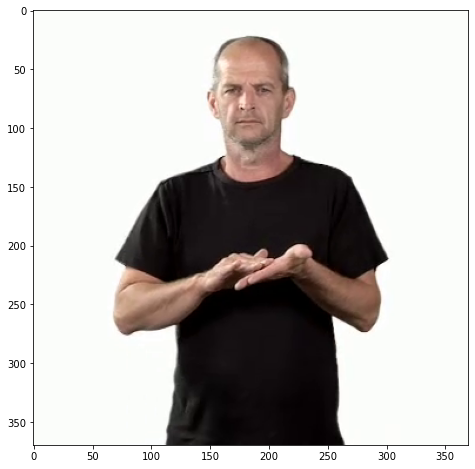

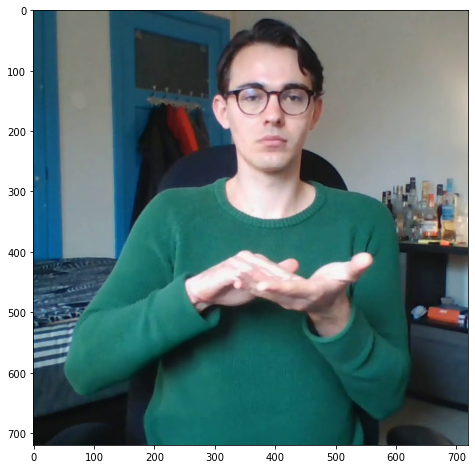

In [113]:
frame_original = get_frame_i('C:/Users/markw/Documents/Master Stage Videos/NGTvideos/ZALF-2183.mp4', [50], 'original')
frame_recorded = get_frame_i('C:/Users/markw\Documents/Master Stage Videos/Filmpjes Mark/MARK CROPPED/ZALF-2183_Trim.mp4', [50], 'recorded')

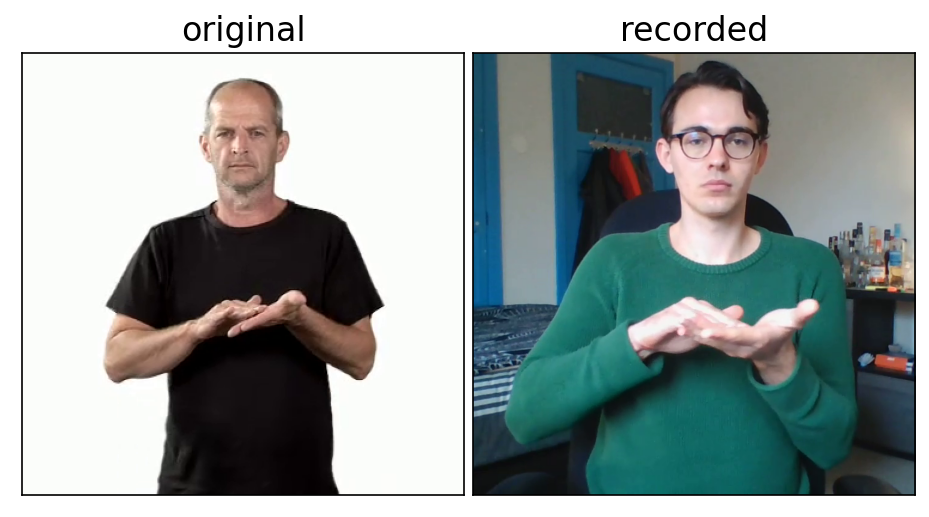

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=2, facecolor='white', dpi=150)
# Original
axes[0].imshow(frame_original)
axes[0].set_title('original', size=16)
# Recorded
axes[1].imshow(frame_recorded)
axes[1].set_title('recorded', size=16)
# Supress axes
axes[0].xaxis.set_visible(False)
axes[0].yaxis.set_visible(False)
axes[1].xaxis.set_visible(False)
axes[1].yaxis.set_visible(False)

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0, w_pad=0.05, h_pad=0)

plt.show()